In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime

from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

In [28]:
all_set = pd.read_csv('./data/전체데이터원본.csv')

In [29]:
all_set.head()

,주차장명,진입시각,진출시각,입출구명,고객구분,차종,주차시간(분),연도
0,서울어린이대공원,2017-01-01 00:00:47,2017-01-07 17:21:59,후문출구,정기권,소형,9682,2017
1,서울어린이대공원,2017-01-01 00:02:54,2017-01-01 17:39:08,구의문출구,정기권,소형,1057,2017
2,서울어린이대공원,2017-01-01 00:05:14,2017-01-01 20:49:35,CMB(정문),일반,소형,1245,2017
3,서울어린이대공원,2017-01-01 00:09:14,2017-01-01 14:32:37,구의문출구,정기권,소형,864,2017
4,서울어린이대공원,2017-01-01 00:25:43,2017-01-01 08:41:00,CMB(후문),일반,소형,494,2017


# 주차장 데이터 전처리

In [30]:
# 불필요한 컬럼 제거
all_set.drop('주차장명', axis=1, inplace=True)

### 전체 null 값 확인

In [31]:
import missingno as msno

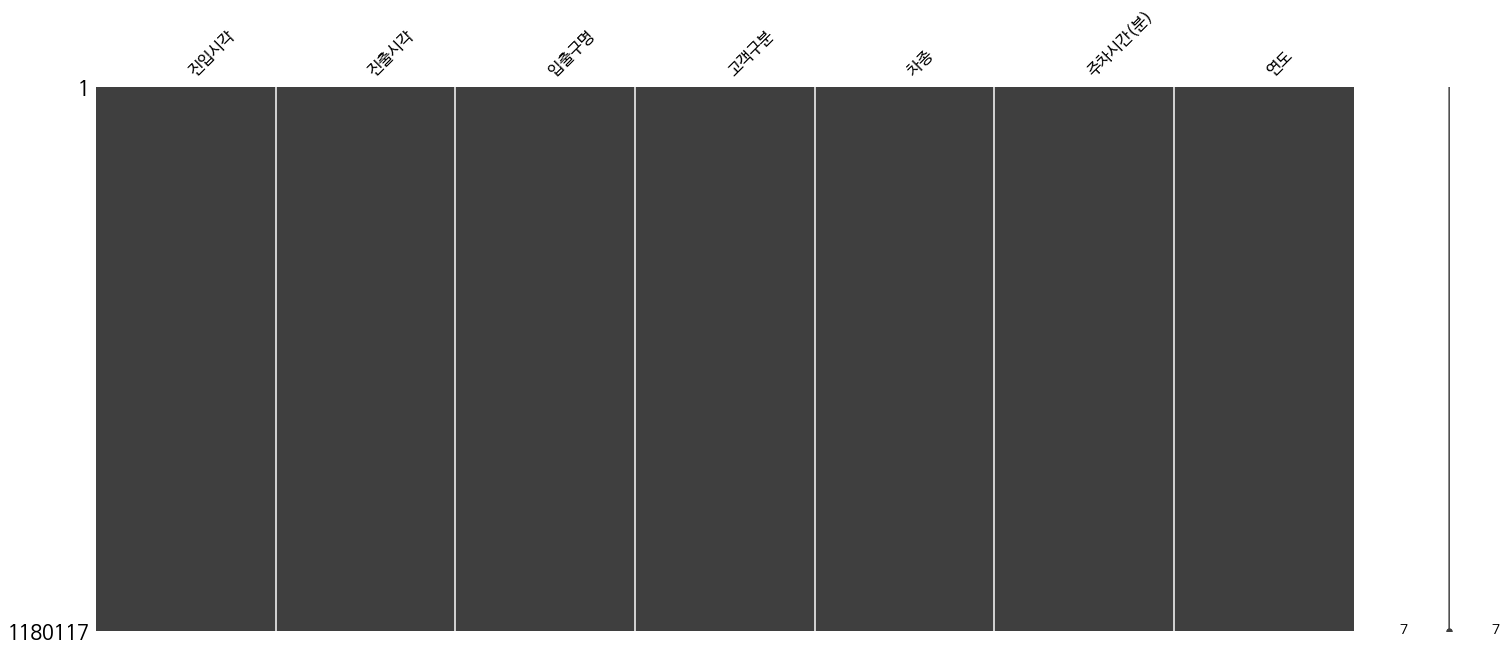

In [32]:
msno.matrix(all_set)

In [33]:
all_set.dtypes

진입시각       object
진출시각       object
입출구명       object
고객구분       object
차종         object
주차시간(분)     int64
연도          int64
dtype: object

## 각 칼럼에 알맞은 형식으로 변환

In [34]:
all_set['진입시각'] = pd.to_datetime(all_set['진입시각'])

In [35]:
sorted(all_set['진출시각'].unique(), reverse=True)

['중복입차',
 '주차중',
 '수동출차',
 '2019-10-24 10:35:09',
 '2019-10-24 10:32:30',
 '2019-10-24 10:31:22',
 '2019-10-24 10:30:40',
 '2019-10-24 10:29:11',
 '2019-10-24 10:28:11',
 '2019-10-24 10:27:12',
 '2019-10-24 10:26:58',
 '2019-10-24 10:25:52',
 '2019-10-24 10:25:32',
 '2019-10-24 10:24:53',
 '2019-10-24 10:24:06',
 '2019-10-24 10:23:06',
 '2019-10-24 10:18:34',
 '2019-10-24 10:18:32',
 '2019-10-24 10:17:55',
 '2019-10-24 10:16:56',
 '2019-10-24 10:16:42',
 '2019-10-24 10:16:41',
 '2019-10-24 10:15:16',
 '2019-10-24 10:15:04',
 '2019-10-24 10:14:55',
 '2019-10-24 10:14:08',
 '2019-10-24 10:12:41',
 '2019-10-24 10:07:01',
 '2019-10-24 10:06:42',
 '2019-10-24 10:05:57',
 '2019-10-24 10:05:23',
 '2019-10-24 10:01:30',
 '2019-10-24 09:58:05',
 '2019-10-24 09:47:38',
 '2019-10-24 09:45:42',
 '2019-10-24 09:45:17',
 '2019-10-24 09:43:49',
 '2019-10-24 09:40:38',
 '2019-10-24 09:39:53',
 '2019-10-24 09:39:40',
 '2019-10-24 09:38:03',
 '2019-10-24 09:34:54',
 '2019-10-24 09:33:42',
 '2019-10-24 0

In [36]:
sorted(all_set['진출시각'].unique())

['2017-01-01 00:55:04',
 '2017-01-01 01:07:41',
 '2017-01-01 01:22:17',
 '2017-01-01 01:22:59',
 '2017-01-01 01:38:34',
 '2017-01-01 02:05:44',
 '2017-01-01 02:22:01',
 '2017-01-01 02:42:11',
 '2017-01-01 02:51:20',
 '2017-01-01 04:36:09',
 '2017-01-01 04:43:32',
 '2017-01-01 05:36:07',
 '2017-01-01 05:41:13',
 '2017-01-01 05:44:52',
 '2017-01-01 06:05:25',
 '2017-01-01 06:11:02',
 '2017-01-01 06:18:51',
 '2017-01-01 07:06:45',
 '2017-01-01 07:15:31',
 '2017-01-01 07:44:08',
 '2017-01-01 07:47:58',
 '2017-01-01 07:56:12',
 '2017-01-01 08:00:22',
 '2017-01-01 08:00:52',
 '2017-01-01 08:01:59',
 '2017-01-01 08:06:20',
 '2017-01-01 08:19:55',
 '2017-01-01 08:24:18',
 '2017-01-01 08:25:16',
 '2017-01-01 08:26:12',
 '2017-01-01 08:28:08',
 '2017-01-01 08:29:05',
 '2017-01-01 08:29:14',
 '2017-01-01 08:29:54',
 '2017-01-01 08:30:12',
 '2017-01-01 08:30:59',
 '2017-01-01 08:31:26',
 '2017-01-01 08:31:28',
 '2017-01-01 08:31:37',
 '2017-01-01 08:32:45',
 '2017-01-01 08:33:07',
 '2017-01-01 08:

## 진출시각에서 '수동출차'한 경우, 진입시간 + 주차시간으로 진출시각 계산


In [37]:
pd.to_datetime('2019-01-10 08:01:32') + datetime.timedelta(minutes=30000000)

Timestamp('2076-01-24 16:01:32')

In [38]:
all_set.loc[all_set['진출시각'] == '수동출차']

,진입시각,진출시각,입출구명,고객구분,차종,주차시간(분),연도
668970,2019-01-10 08:01:32,수동출차,CMB(정문),일반,소형,693,2019
668971,2019-01-10 09:01:08,수동출차,CMB(정문),일반,소형,563,2019
668972,2019-01-10 09:01:32,수동출차,CMB(정문),일반,소형,633,2019
668974,2019-01-10 09:34:37,수동출차,CMB(정문),일반,소형,600,2019
668975,2019-01-10 09:51:55,수동출차,CMB(정문),일반,소형,583,2019
...,...,...,...,...,...,...,...
1179575,2019-10-24 05:33:00,수동출차,정문입구,일반,소형,174,2019
1179591,2019-10-24 06:03:28,수동출차,구의문입구,일반,소형,119,2019
1179608,2019-10-24 06:25:42,수동출차,구의문입구,일반,소형,96,2019
1179658,2019-10-24 07:17:04,수동출차,구의문입구,일반,소형,44,2019


In [39]:
manually_out = all_set.loc[all_set['진출시각'] == '수동출차']
manually_out['진출시각'] = manually_out.apply(lambda row: pd.to_datetime(row['진입시각'] + datetime.timedelta(minutes=float(row['주차시간(분)'])) ), axis=1)
all_set.loc[all_set['진출시각'] == '수동출차', '진출시각'] = manually_out['진출시각'].map(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

/home/leebom/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
all_set.iloc[668970]['진출시각']

'2019-01-10 19:34:32'

## 나머지 진출시각에서 시각 형식으로 쓰여있지 않은 데이터는 따로 저장 후 제외

중복입차(1310개), 주차중(376개)

In [41]:
all_set.groupby('진출시각').count()[-5:]['고객구분']

진출시각
2019-10-24 10:31:22       1
2019-10-24 10:32:30       1
2019-10-24 10:35:09       1
주차중                     376
중복입차                   1310
Name: 고객구분, dtype: int64

In [42]:
mssing_out_hours = all_set.loc[all_set['진출시각'].isin(['수동출차', '주차중'])]

In [43]:
mssing_out_hours.to_csv('./data/[회귀]save_all_수동출차_주차중_제외데이터.csv', index=False)

In [44]:
# 원본 저장
all_set_save = all_set

In [45]:
all_set = all_set.loc[~all_set['진출시각'].isin(['중복입차', '주차중'])]

In [46]:
all_set['진출시각'] = pd.to_datetime(all_set['진출시각'])

/home/leebom/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
all_set.to_csv('./data/[회귀]all_수동출차_imputation_완료.csv', index=False)

## 입출구명 정제

In [48]:
all_set['입출구명'].unique()

array(['후문출구', '구의문출구', 'CMB(정문)', 'CMB(후문)', 'CMB구의문)', '정문출구1', '정문출구2',
       'CMC(서버실)', '사전무인#1', '사전무인#2', '정문입구', '구의문입구', '후문입구'],
      dtype=object)

In [49]:
all_set.replace({'후문출구':'후문', '구의문출구':'구의문', 'CMB(정문)':'정문', 'CMB(후문)':'후문', 'CMB구의문)':'구의문', '정문출구1':'정문', '정문출구2':'정문', 'CMC(서버실)':'서버실', '사전무인#1':'사전무인', '사전무인#2':'사전무인', '정문입구':'정문', '구의문입구':'구의문', '후문입구':'후문'}, inplace=True)

In [50]:
all_set['입출구명'].unique()

array(['후문', '구의문', '정문', '서버실', '사전무인'], dtype=object)

In [51]:
all_set.to_csv('./data/[회귀]all_1차_전처리_완료.csv', index=False)